In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import os

from utilities import *

PyDIPjavaio unavailable:
libjvm.so: cannot open shared object file: No such file or directory

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


In [2]:
dip_images, dip_names = load_dip_images('data')

dip_gray, dip_blue = make_grayscale(dip_images)
save_images(dip_gray, 'gray', "gray", file_type=["tif"])
save_images(dip_blue, 'blues', "blue", file_type=["tif"])


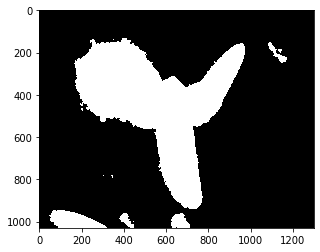

In [3]:
# threshold and morphological operators
dip_thresh = threshold_images(dip_blue)
save_images(dip_thresh, 'thresh', "thresh", file_type=["tif"])
#dip_transf = apply_transformations(dip_thresh)
#save_images(dip_transf, 'transf', "transf", file_type=["tif"])

dip_thresh[1].Show()

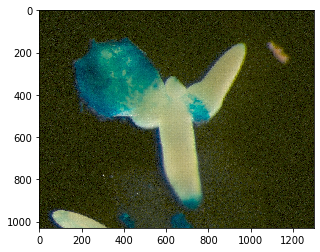

In [6]:
dip_data, dip_names = load_dip_images('data')
dip_blue, blue_names = load_dip_images('blues')
dip_grays, grays_names = load_dip_images('grays')
test = dip_data[1]
test.Show()

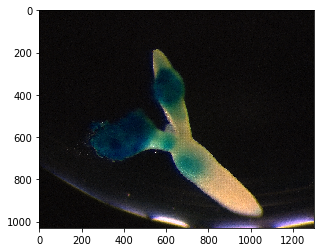

Kuwahara


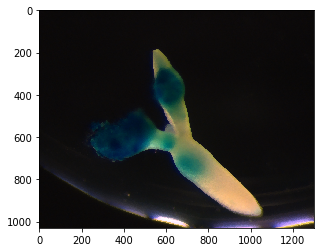

blue channel


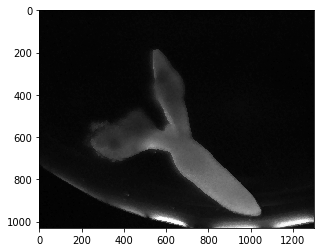

thresh


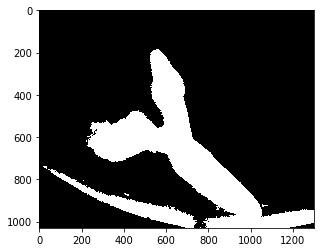

In [18]:
test = dip_data[61]
test.Show()
test_1 = dip.Kuwahara(test, 5,5)
print("Kuwahara")
test_1.Show()
blue_ch = dip.Image(np.array(test_1)[:,:,2])
print("blue channel")
blue_ch.Show()
test_thr = dip.TriangleThreshold(blue_ch)
print("thresh")
test_thr.Show()


In [10]:
# create blu and gray images from data
# dip_images, dip_names = load_dip_images('data')

# dip_gray, dip_blue = make_grayscale(dip_images)
# save_images(dip_gray, 'gray', "gray", file_type=["tif"])
# save_images(dip_blue, 'blues', "blue", file_type=["tif"])

# dip_gray[1].Show()

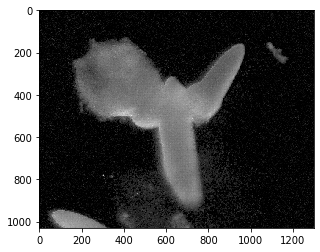

In [9]:
test_1 = dip.ColorSpaceManager.Convert(test, "gray")
test_1.Show()

In [22]:
def apply_transformations(dip_images: list):
    """ Applies the defined transform to the dip_images
        Input:
            - dip_images: python list of diplib images
        Return:
            - out_images: python list with the transformed diplib images 
    """
    out_images = dip_images.copy()
    for i in range(len(out_images)):
        # opening to remove white pixel noise
        out_images[i] = dip.Opening(out_images[i])
        # closing to fill dark holes:
        out_images[i] = dip.Closing(out_images[i])
        # erosion to remove boundary pixels
        out_images[i] = dip.Erosion(out_images[i])
        #out_images[i] = dip.Erosion(out_images[i])
        # dilation to extend object boundary to background
        out_images[i] = dip.Dilation(out_images[i])
        # close any hole in the image
        # opening to remove white pixel noise
        # out_images[i] = dip.Opening(out_images[i])
        out_images[i] = dip.FillHoles(out_images[i])
    return out_images

In [23]:
dip_transf = apply_transformations(dip_thresh)
save_images(dip_transf, 'transf', "transf", file_type=["tif"])

In [ ]:
features = ['Perimeter', 'Size',
                'Circularity','Roundness',
                'Statistics']
                
dip_labeled, measurements = measure_elements(dip_transf, dip_gray, features=features)

In [ ]:
measurements

In [ ]:
img = dip_images[0]
arr = np.array(img)
aa = arr[:,:,2]
blue = dip.Image(aa)
blue.Show()
blue = dip.Gauss(blue, sigmas=[2])
thresh= dip.TriangleThreshold(blue)

open = dip.Opening(thresh)


thresh.Show()

In [ ]:
arr

In [ ]:
np.array(blue)

In [ ]:
np.where(aa ==0)

In [ ]:
np.array(dip_images[:,;,2])

In [ ]:
blues=[]
grays = []
for img in dip_images:
    array= np.array(img)
    new_img = dip.ColorSpaceManager.Convert(img, "gray")
    blue_img = dip.Image(array[:,:,2])
    blues.append(blue_img)
    grays.append(new_img)